# Question 1

[1.5v] Apply f_classif from sklearn to assess the discriminative power of the input variables.
Identify the input variable with the highest and lowest discriminative power.                              
Plot the class-conditional probability density functions of these two input variables.

In [1]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

fimportance = f_classif(X, y)
features = X.columns.values
scores = fimportance[0]

highest_score_index = scores.argmax()
lowest_score_index = scores.argmin()

print(f'Highest discriminative power: {features[highest_score_index]} ({round(scores[highest_score_index], 2)})')
print(f'Lowest discriminative power: {features[lowest_score_index]} ({round(scores[lowest_score_index], 2)})')

Highest discriminative power: degree_spondylolisthesis (119.12)
Lowest discriminative power: pelvic_radius (16.87)


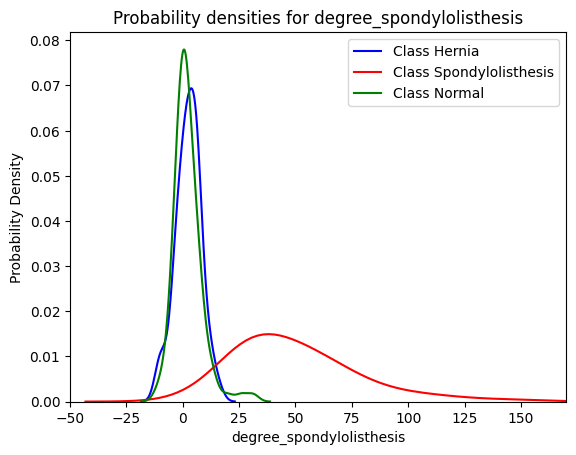

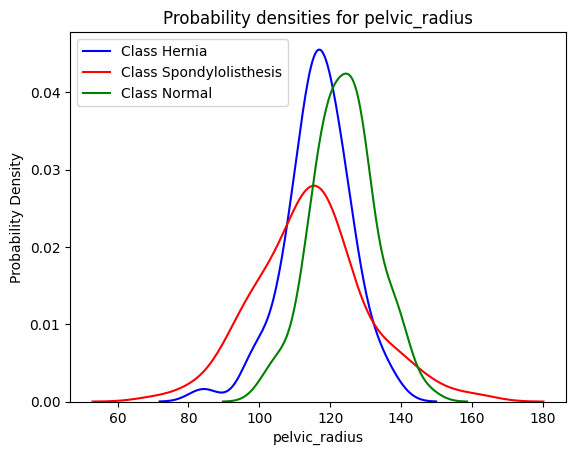

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df.loc[df['class'] == 'Hernia', features[highest_score_index]], label='Class Hernia', color='blue')
sns.kdeplot(df.loc[df['class'] == 'Spondylolisthesis', features[highest_score_index]], label='Class Spondylolisthesis', color='red')
sns.kdeplot(df.loc[df['class'] == 'Normal', features[highest_score_index]], label='Class Normal', color='green')

plt.xlabel(features[highest_score_index])
plt.ylabel('Probability Density')
plt.title(f'Probability densities for {features[highest_score_index]}')
plt.legend()
plt.xlim(-50 , 170)
plt.show()


sns.kdeplot(df.loc[df['class'] == 'Hernia', features[lowest_score_index]], label='Class Hernia', color='blue')
sns.kdeplot(df.loc[df['class'] == 'Spondylolisthesis', features[lowest_score_index]], label='Class Spondylolisthesis', color='red')
sns.kdeplot(df.loc[df['class'] == 'Normal', features[lowest_score_index]], label='Class Normal', color='green')

plt.xlabel(features[lowest_score_index])
plt.ylabel('Probability Density')
plt.title(f'Probability densities for {features[lowest_score_index]}')
plt.legend()
plt.show()

# Question 2

[4v] Using a stratified 70-30 training-testing split with a fixed seed (random_state=0), assess in a 
single plot both the training and testing accuracies of a decision tree with depth limits in 
{1,2,3,4,5,6,8,10} and the remaining parameters as default.  
[optional] Note that split thresholding of numeric variables in decision trees is non-deterministic 
in sklearn, hence you may opt to average the results using 10 runs per parameterization. 

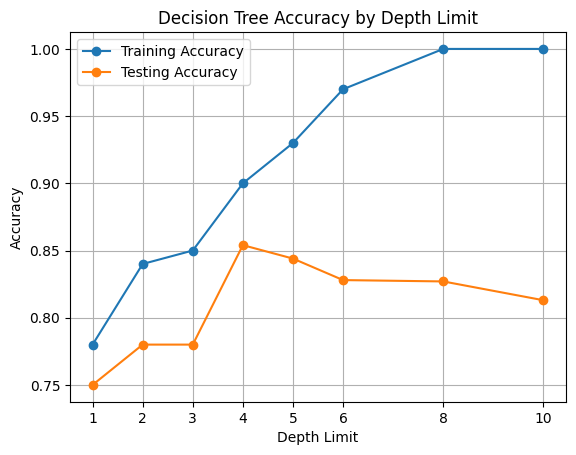

In [3]:
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, stratify=y)

depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]
train_accuracies = []
test_accuracies = []

for depth_limit in depth_limits:
    training_accuracy_sum = 0
    testing_accuracy_sum = 0

    for _ in range(10):
        predictor = tree.DecisionTreeClassifier(max_depth=depth_limit)
        predictor.fit(X_train, y_train)

        training_accuracy_sum += round(metrics.accuracy_score(y_train, predictor.predict(X_train)), 2)
        testing_accuracy_sum += round(metrics.accuracy_score(y_test, predictor.predict(X_test)), 2)

    train_accuracies.append(training_accuracy_sum / 10)
    test_accuracies.append(testing_accuracy_sum / 10)

plt.plot(depth_limits, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depth_limits, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Decision Tree Accuracy by Depth Limit')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.xticks(depth_limits)
plt.legend()
plt.grid()
plt.show()

# Question 3

[1.5v] Comment on the results, including the generalization capacity across settings. 

R: Analisando o gráfico anterior, podemos constatar que a accuracy do modelo é maior quando aplicado aos dados de treino do que quando aplicado aos dados de teste.
Tipicamente, isto indica que estamos perante um caso de overfitting, isto é, o modelo aprendeu padrões demasiado específicos aos dados de treino, resultando numa menor accuracy quando aplicado aos dados de teste.
Desta forma, obtivemos um modelo pouco generalizado que não está adaptado à população.

# Question 4

[2v] To deploy the predictor, a healthcare team opted to learn a single decision tree 
(random_state=0) using all available data as training data, and further ensuring that each leaf has 
a minimum of 20 individuals in order to avoid overfitting risks.  
1. **Plot the decision tree.**

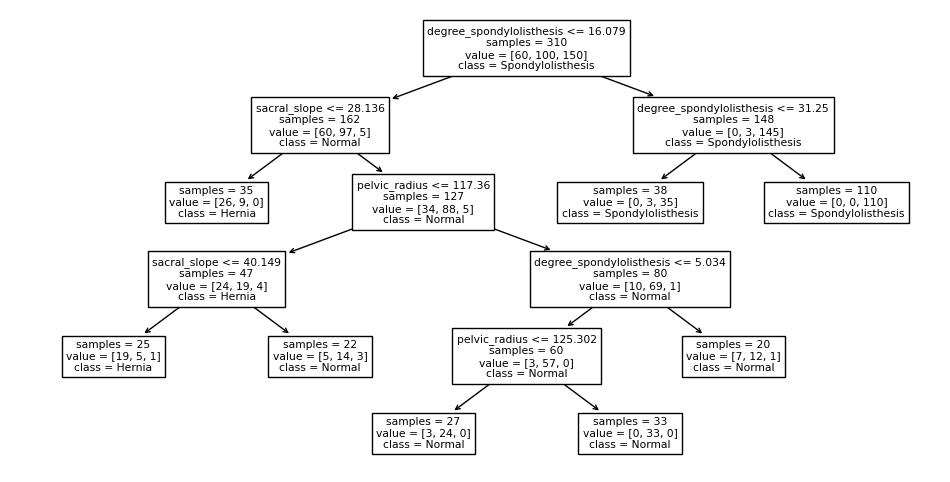

In [4]:
predictor = tree.DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
predictor.fit(X, y)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=X.columns.to_list(), class_names=sorted(list(y.unique())), impurity=False)
plt.show()

2. **Characterize a hernia condition by identifying the hernia-conditional associations.**


R: A classe hernia é caracterizada por uma das duas seguintes condições:
1. degree_spondylolisthesis <= 16.079 $\land$ sacral_scope <= 28.136

2. degree_spondylolisthesis <= 16.079 $\land$ 28.136 < sacral_scope <= 40.149 $\land$ pelvic_radius <= 117.36